### Importing modules

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path
import os, json, re

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', None)

%matplotlib inline

### Importing Data

In [4]:
data = pd.read_csv("./telecom_churn_data.csv")
data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...            0        1.0        1.0   
1            9/30/2014   34.047  ...            0        NaN        1.0   
2            9/30/2014  167.690  ...            0        NaN        NaN   
3            9/30/2014  221.338  ...            0        NaN        NaN   
4            9/30/2014  261.636  ...            0        0.0        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  
3        NaN        NaN  2491         0.0         0.0        0.00        0.00  
4        NaN        NaN  1526         0.0         0.0        0.00        0.00  

[5 rows x 226 columns]

In [5]:
# look at the shape of the data
data.shape

(99999, 226)

In [6]:
# look at number of columns
len(list(data.columns))

226

In [7]:
# peek at the data type of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [8]:
# look at data statistics
data.describe(include='all')

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count    9.999900e+04    99999.0         98981.0         98981.0   
unique            NaN        NaN             NaN             NaN   
top               NaN        NaN             NaN             NaN   
freq              NaN        NaN             NaN             NaN   
mean     7.001207e+09      109.0             0.0             0.0   
std      6.956694e+05        0.0             0.0             0.0   
min      7.000000e+09      109.0             0.0             0.0   
25%      7.000606e+09      109.0             0.0             0.0   
50%      7.001205e+09      109.0             0.0             0.0   
75%      7.001812e+09      109.0             0.0             0.0   
max      7.002411e+09      109.0             0.0             0.0   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
count          98981.0                99999                99398   
unique             NaN                    1                    1   
top                NaN            6/30/2014            7/31/2014   
freq               NaN                99999                99398   
mean               0.0                  NaN                  NaN   
std                0.0                  NaN                  NaN   
min                0.0                  NaN                  NaN   
25%                0.0                  NaN                  NaN   
50%                0.0                  NaN                  NaN   
75%                0.0                  NaN                  NaN   
max                0.0                  NaN                  NaN   

       last_date_of_month_8 last_date_of_month_9        arpu_6  ...  \
count                 98899                98340  99999.000000  ...   
unique                    1                    1           NaN  ...   
top               8/31/2014            9/30/2014           NaN  ...   
freq                  98899                98340           NaN  ...   
mean                    NaN                  NaN    282.987358  ...   
std                     NaN                  NaN    328.439770  ...   
min                     NaN                  NaN  -2258.709000  ...   
25%                     NaN                  NaN     93.411500  ...   
50%                     NaN                  NaN    197.704000  ...   
75%                     NaN                  NaN    371.060000  ...   
max                     NaN                  NaN  27731.088000  ...   

         sachet_3g_9     fb_user_6     fb_user_7     fb_user_8     fb_user_9  \
count   99999.000000  25153.000000  25571.000000  26339.000000  25922.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        0.084581      0.914404      0.908764      0.890808      0.860968   
std         0.650457      0.279772      0.287950      0.311885      0.345987   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.000000      1.000000      1.000000      1.000000      1.000000   
50%         0.000000      1.000000      1.000000      1.000000      1.000000   
75%         0.000000      1.000000      1.000000      1.000000      1.000000   
max        49.000000      1.000000      1.000000      1.000000      1.000000   

                 aon    aug_vbc_3g    jul_vbc_3g    jun_vbc_3g    sep_vbc_3g  
count   99999.000000  99999.000000  99999.000000  99999.000000  99999.000000  
unique           NaN           NaN           NaN           NaN           NaN  
top              NaN           NaN           NaN           NaN           NaN  
freq             NaN           NaN           NaN           NaN           NaN  
mean     1219.854749     68.170248     66.839062     60.021204      3.299373  
std       954.733842    267.580450    271.201856    253.938223     32.408353  
min    

In [9]:
initial_column_list = list(data.columns)

id_column_list = ['mobile_number', 'circle_id']

date_column_list = ['last_date_of_month_6',
                     'last_date_of_month_7',
                     'last_date_of_month_8',
                     'last_date_of_month_9',
                     'date_of_last_rech_6',
                     'date_of_last_rech_7',
                     'date_of_last_rech_8',
                     'date_of_last_rech_9',
                     'date_of_last_rech_data_6',
                     'date_of_last_rech_data_7',
                     'date_of_last_rech_data_8',
                     'date_of_last_rech_data_9'
                    ]

cat_column_list =  ['night_pck_user_6',
                     'night_pck_user_7',
                     'night_pck_user_8',
                     'night_pck_user_9',
                     'fb_user_6',
                     'fb_user_7',
                     'fb_user_8',
                     'fb_user_9'
                    ]

### Removing Redundant columns

In [10]:
# Removing Date and Id Columns
data = data.drop(columns = id_column_list + date_column_list)
data.shape

(99999, 212)

In [11]:
# checking columns with single value in all the columns and the corresponding single value
columns_with_single_value = {}
for x in data.columns:
    if len(data[x].value_counts()) == 1:
        columns_with_single_value[x]=list(dict(data[x].value_counts()).keys())[0]
columns_with_single_value

{'loc_og_t2o_mou': 0.0,
 'std_og_t2o_mou': 0.0,
 'loc_ic_t2o_mou': 0.0,
 'std_og_t2c_mou_6': 0.0,
 'std_og_t2c_mou_7': 0.0,
 'std_og_t2c_mou_8': 0.0,
 'std_og_t2c_mou_9': 0.0,
 'std_ic_t2o_mou_6': 0.0,
 'std_ic_t2o_mou_7': 0.0,
 'std_ic_t2o_mou_8': 0.0,
 'std_ic_t2o_mou_9': 0.0}

In [12]:
data = data.drop(columns = columns_with_single_value.keys())
data.shape

(99999, 201)

### Handle Missing Values

In [13]:
# print list of missing columns 
data.isna().sum()[(data.isna().sum()/len(data.index))*100 > 0]

onnet_mou_6            3937
onnet_mou_7            3859
onnet_mou_8            5378
onnet_mou_9            7745
offnet_mou_6           3937
offnet_mou_7           3859
offnet_mou_8           5378
offnet_mou_9           7745
roam_ic_mou_6          3937
roam_ic_mou_7          3859
roam_ic_mou_8          5378
roam_ic_mou_9          7745
roam_og_mou_6          3937
roam_og_mou_7          3859
roam_og_mou_8          5378
roam_og_mou_9          7745
loc_og_t2t_mou_6       3937
loc_og_t2t_mou_7       3859
loc_og_t2t_mou_8       5378
loc_og_t2t_mou_9       7745
loc_og_t2m_mou_6       3937
loc_og_t2m_mou_7       3859
loc_og_t2m_mou_8       5378
loc_og_t2m_mou_9       7745
loc_og_t2f_mou_6       3937
loc_og_t2f_mou_7       3859
loc_og_t2f_mou_8       5378
loc_og_t2f_mou_9       7745
loc_og_t2c_mou_6       3937
loc_og_t2c_mou_7       3859
loc_og_t2c_mou_8       5378
loc_og_t2c_mou_9       7745
loc_og_mou_6           3937
loc_og_mou_7           3859
loc_og_mou_8           5378
loc_og_mou_9        

In [14]:
na_list = list(dict(data.isna().sum()[(data.isna().sum()/len(data.index))*100 > 0]).keys())
len(na_list)

144

In [15]:
zero_impute_list = [x for x in na_list if x not in date_column_list and x not in cat_column_list]
zero_impute_list

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'std_og_mou_9',


As we can see from above all the colummns in the zero_impute_list are either counts, recharge, mou or data<br>
NaN in the above columns means that there is no count or no recharge done<br>
so we can impute 0 in all the above columns

In [16]:
# imputing with 0 for recharge, cont, mou, data columns
data[zero_impute_list] = data[zero_impute_list].fillna(0)

In [17]:
# print list of missing columns 
data.isna().sum()[(data.isna().sum()/len(data.index))*100 > 0]

night_pck_user_6    74846
night_pck_user_7    74428
night_pck_user_8    73660
night_pck_user_9    74077
fb_user_6           74846
fb_user_7           74428
fb_user_8           73660
fb_user_9           74077
dtype: int64

Removed all the missing values from the data
### Handling Data Types

In [18]:
# Handling categorical columns (filling -1 in place of na)
data[cat_column_list] = data[cat_column_list].fillna(-1)

In [19]:
data.isna().sum()[(data.isna().sum()/len(data.index))*100 > 0]/len(data.isna())

Series([], dtype: float64)

In [20]:
cat_column_list_2 = [x for x in cat_column_list if x in data.columns]
data[cat_column_list_2] = data[cat_column_list_2].apply(lambda column: column.astype("category"), axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 201 entries, arpu_6 to sep_vbc_3g
dtypes: category(8), float64(160), int64(33)
memory usage: 148.0 MB


### Creating Target Variable

In [21]:
# usage based column creating

data["usage_mou_6"] = data.total_og_mou_6 + data.total_ic_mou_6
data["usage_mou_7"] = data.total_og_mou_7 + data.total_ic_mou_7
data["usage_mou_8"] = data.total_og_mou_8 + data.total_ic_mou_8
data["usage_mou_9"] = data.total_og_mou_9 + data.total_ic_mou_9

data["usage_data_6"] = data.monthly_3g_6 + data.monthly_2g_6
data["usage_data_7"] = data.monthly_3g_7 + data.monthly_2g_7
data["usage_data_8"] = data.monthly_3g_8 + data.monthly_2g_8
data["usage_data_9"] = data.monthly_3g_9 + data.monthly_2g_9

data["usage_6"] = data.usage_data_6 + data.usage_mou_6
data["usage_7"] = data.usage_data_7 + data.usage_mou_7
data["usage_8"] = data.usage_data_8 + data.usage_mou_8
data["usage_9"] = data.usage_data_9 + data.usage_mou_9

In [22]:
# Creating Columns That show the difference betweenthe 8th month and the average of values of the 6th and 7th month

data['arpu_diff'] = data.arpu_8 - ((data.arpu_6 + data.arpu_7)/2)
data['onnet_mou_diff'] = data.onnet_mou_8 - ((data.onnet_mou_6 + data.onnet_mou_7)/2)
data['offnet_mou_diff'] = data.offnet_mou_8 - ((data.offnet_mou_6 + data.offnet_mou_7)/2)
data['roam_ic_mou_diff'] = data.roam_ic_mou_8 - ((data.roam_ic_mou_6 + data.roam_ic_mou_7)/2)
data['roam_og_mou_diff'] = data.roam_og_mou_8 - ((data.roam_og_mou_6 + data.roam_og_mou_7)/2)
data['loc_og_mou_diff'] = data.loc_og_mou_8 - ((data.loc_og_mou_6 + data.loc_og_mou_7)/2)
data['std_og_mou_diff'] = data.std_og_mou_8 - ((data.std_og_mou_6 + data.std_og_mou_7)/2)
data['isd_og_mou_diff'] = data.isd_og_mou_8 - ((data.isd_og_mou_6 + data.isd_og_mou_7)/2)
data['spl_og_mou_diff'] = data.spl_og_mou_8 - ((data.spl_og_mou_6 + data.spl_og_mou_7)/2)
data['total_og_mou_diff'] = data.total_og_mou_8 - ((data.total_og_mou_6 + data.total_og_mou_7)/2)
data['loc_ic_mou_diff'] = data.loc_ic_mou_8 - ((data.loc_ic_mou_6 + data.loc_ic_mou_7)/2)
data['std_ic_mou_diff'] = data.std_ic_mou_8 - ((data.std_ic_mou_6 + data.std_ic_mou_7)/2)
data['isd_ic_mou_diff'] = data.isd_ic_mou_8 - ((data.isd_ic_mou_6 + data.isd_ic_mou_7)/2)
data['spl_ic_mou_diff'] = data.spl_ic_mou_8 - ((data.spl_ic_mou_6 + data.spl_ic_mou_7)/2)
data['total_ic_mou_diff'] = data.total_ic_mou_8 - ((data.total_ic_mou_6 + data.total_ic_mou_7)/2)
data['total_rech_num_diff'] = data.total_rech_num_8 - ((data.total_rech_num_6 + data.total_rech_num_7)/2)
data['total_rech_amt_diff'] = data.total_rech_amt_8 - ((data.total_rech_amt_6 + data.total_rech_amt_7)/2)
data['max_rech_amt_diff'] = data.max_rech_amt_8 - ((data.max_rech_amt_6 + data.max_rech_amt_7)/2)
data['total_rech_data_diff'] = data.total_rech_data_8 - ((data.total_rech_data_6 + data.total_rech_data_7)/2)
data['max_rech_data_diff'] = data.max_rech_data_8 - ((data.max_rech_data_6 + data.max_rech_data_7)/2)
data['av_rech_amt_data_diff'] = data.av_rech_amt_data_8 - ((data.av_rech_amt_data_6 + data.av_rech_amt_data_7)/2)
data['vol_2g_mb_diff'] = data.vol_2g_mb_8 - ((data.vol_2g_mb_6 + data.vol_2g_mb_7)/2)
data['vol_3g_mb_diff'] = data.vol_3g_mb_8 - ((data.vol_3g_mb_6 + data.vol_3g_mb_7)/2)

In [23]:
# checking the shape of column upon which we derived target variable
data[data["usage_9"] == 0.0].shape

(10396, 236)

In [24]:
# creating churn column based on 9th month data

data["churn"] = data["usage_9"].apply(lambda x: 1 if x == 0.0 else 0)

In [25]:
# checking out churn counts
data.churn.value_counts()

churn
0    89603
1    10396
Name: count, dtype: int64

### Removing 9th month columns

In [26]:
# detecting all columns with _9 in their name
september_columns = [x for x in data.columns if x.endswith("_9")]
# september_columns

In [27]:
cat_column_list_3 = [x for x in cat_column_list_2 if x not in september_columns]

In [28]:
# dropping september columns from data
data = data.drop(columns=september_columns)
data.shape

(99999, 185)

### Percentage of churn

In [29]:
# getting percentage of customers with churn

(data.churn.value_counts()/len(data.churn))*100

churn
0    89.603896
1    10.396104
Name: count, dtype: float64

there is approximately <b>10.40%</b> of churn

### Filtering High Value Customers

In [30]:
# creating total revenue for the customer for each month

data["total_value_6"] = (data.av_rech_amt_data_6 * data.total_rech_data_6) + data.total_rech_amt_6
data["total_value_7"] = (data.av_rech_amt_data_7 * data.total_rech_data_7) + data.total_rech_amt_7
data["total_value_8"] = (data.av_rech_amt_data_8 * data.total_rech_data_7) + data.total_rech_amt_8

In [31]:
# getting the 70th percentile value according to the criterioin given

percentile_value_70 = np.percentile((data["total_value_6"] + data["total_value_7"])/2, 70)
percentile_value_70

478.0

In [32]:
# filtering high value customers

hvc = data[(data["total_value_6"] + data["total_value_7"])/2 > percentile_value_70]
hvc.shape

(29953, 188)

There are 29953 high value customers according to the criteria determined

In [33]:
# getting percentage of customers with churn

(hvc.churn.value_counts()/len(hvc.churn))*100

churn
0    91.546757
1     8.453243
Name: count, dtype: float64

There is <b>8.5%</b> churn in high value customers

In [34]:
list(hvc.columns)

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

### Utility Functions

In [35]:
from math import ceil

"""
Plotting Univariate Plots of numerical data
"""
def plot_subset_univariate_num(data:pd.DataFrame, columns:list, target:str=None, target_cat:str=False,figsize:tuple=None):
    num_rows = len(columns)
    if figsize is not None:
        plt.figure(figsize=figsize)
    multiplier = 2
    if target is not None:
        multiplier = 3
    for i,col in enumerate(columns):
        plt.subplot(num_rows,multiplier,multiplier*i+1)
        sns.boxplot(data[col])
        plt.subplot(num_rows,multiplier,multiplier*i+2)
        sns.distplot(data[col])
        if target is not None and target_cat:
            plt.subplot(num_rows,multiplier,multiplier*i+3)
            sns.boxplot(data=data,x=target,y=col)

"""
Plotting Bivariate Plots of numerical data
"""
def plot_subset_bivariate_num_cat(data:pd.DataFrame, columns:list, target:str, figsize:tuple=None):
    num_rows = ceil(len(columns) / 2)
    if figsize is not None:
        plt.figure(figsize=figsize)
    for i,col in enumerate(columns):
        plt.subplot(num_rows,2,i)
        sns.boxplot(data=data,x=target,y=col)

"""
Plotting Univariate plots of categorical data
"""
def plot_subset_univariate_cat(data:pd.DataFrame, columns:list, figsize:tuple=None):
    num_rows = ceil(len(columns)/2)
    if figsize is not None:
        plt.figure(figsize=figsize)
    for i,col in enumerate(columns):
        plt.subplot(num_rows,2,i+1)
        sns.countplot(data[col])

In [36]:
hvc.shape

(29953, 188)

### Target Variable Analysis

In [37]:
# value counts of the churn

hvc.churn.value_counts()

churn
0    27421
1     2532
Name: count, dtype: int64

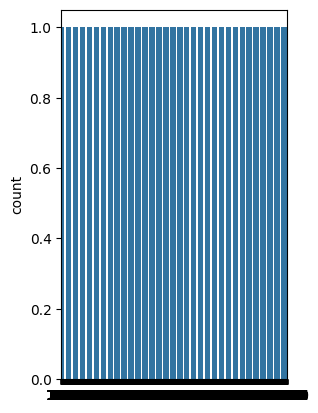

In [38]:
#plot churn

plot_subset_univariate_cat(hvc, ["churn"])

In [39]:
# percentage of the churn

(hvc.churn.value_counts()/len(hvc.churn))*100

churn
0    91.546757
1     8.453243
Name: count, dtype: float64

### Univariate Analysis

In [40]:
# plotting for each of the numerical variable

num_columns_list = [x for x in hvc.columns if x not in cat_column_list_2]
num_columns_list.remove("churn")
plot_subset_univariate_num(hvc, num_columns_list, "churn", True, (20, 700) )

Observations from above plots

1. For all the features in the data the plots in the months of 6,7,8 look almost similar
2. There are  some outliers present in the data which i will remove in the next steps based on the above box plots
3. Most of the features except for some categorical features are left skewed

### Removing Outliers

Removing the outliers from the data selectively from the above box plots

In [41]:
from sklearn.neighbors import LocalOutlierFactor

print("shape before removing outliers ", hvc.shape )

lof = LocalOutlierFactor()
yhat = lof.fit_predict(hvc[num_columns_list])
mask = yhat != -1

hvc = hvc[mask]
print("shape after removing outliers ", hvc.shape )

shape before removing outliers  (29953, 188)
shape after removing outliers  (28041, 188)


### Bivariate Analysis

<Axes: >

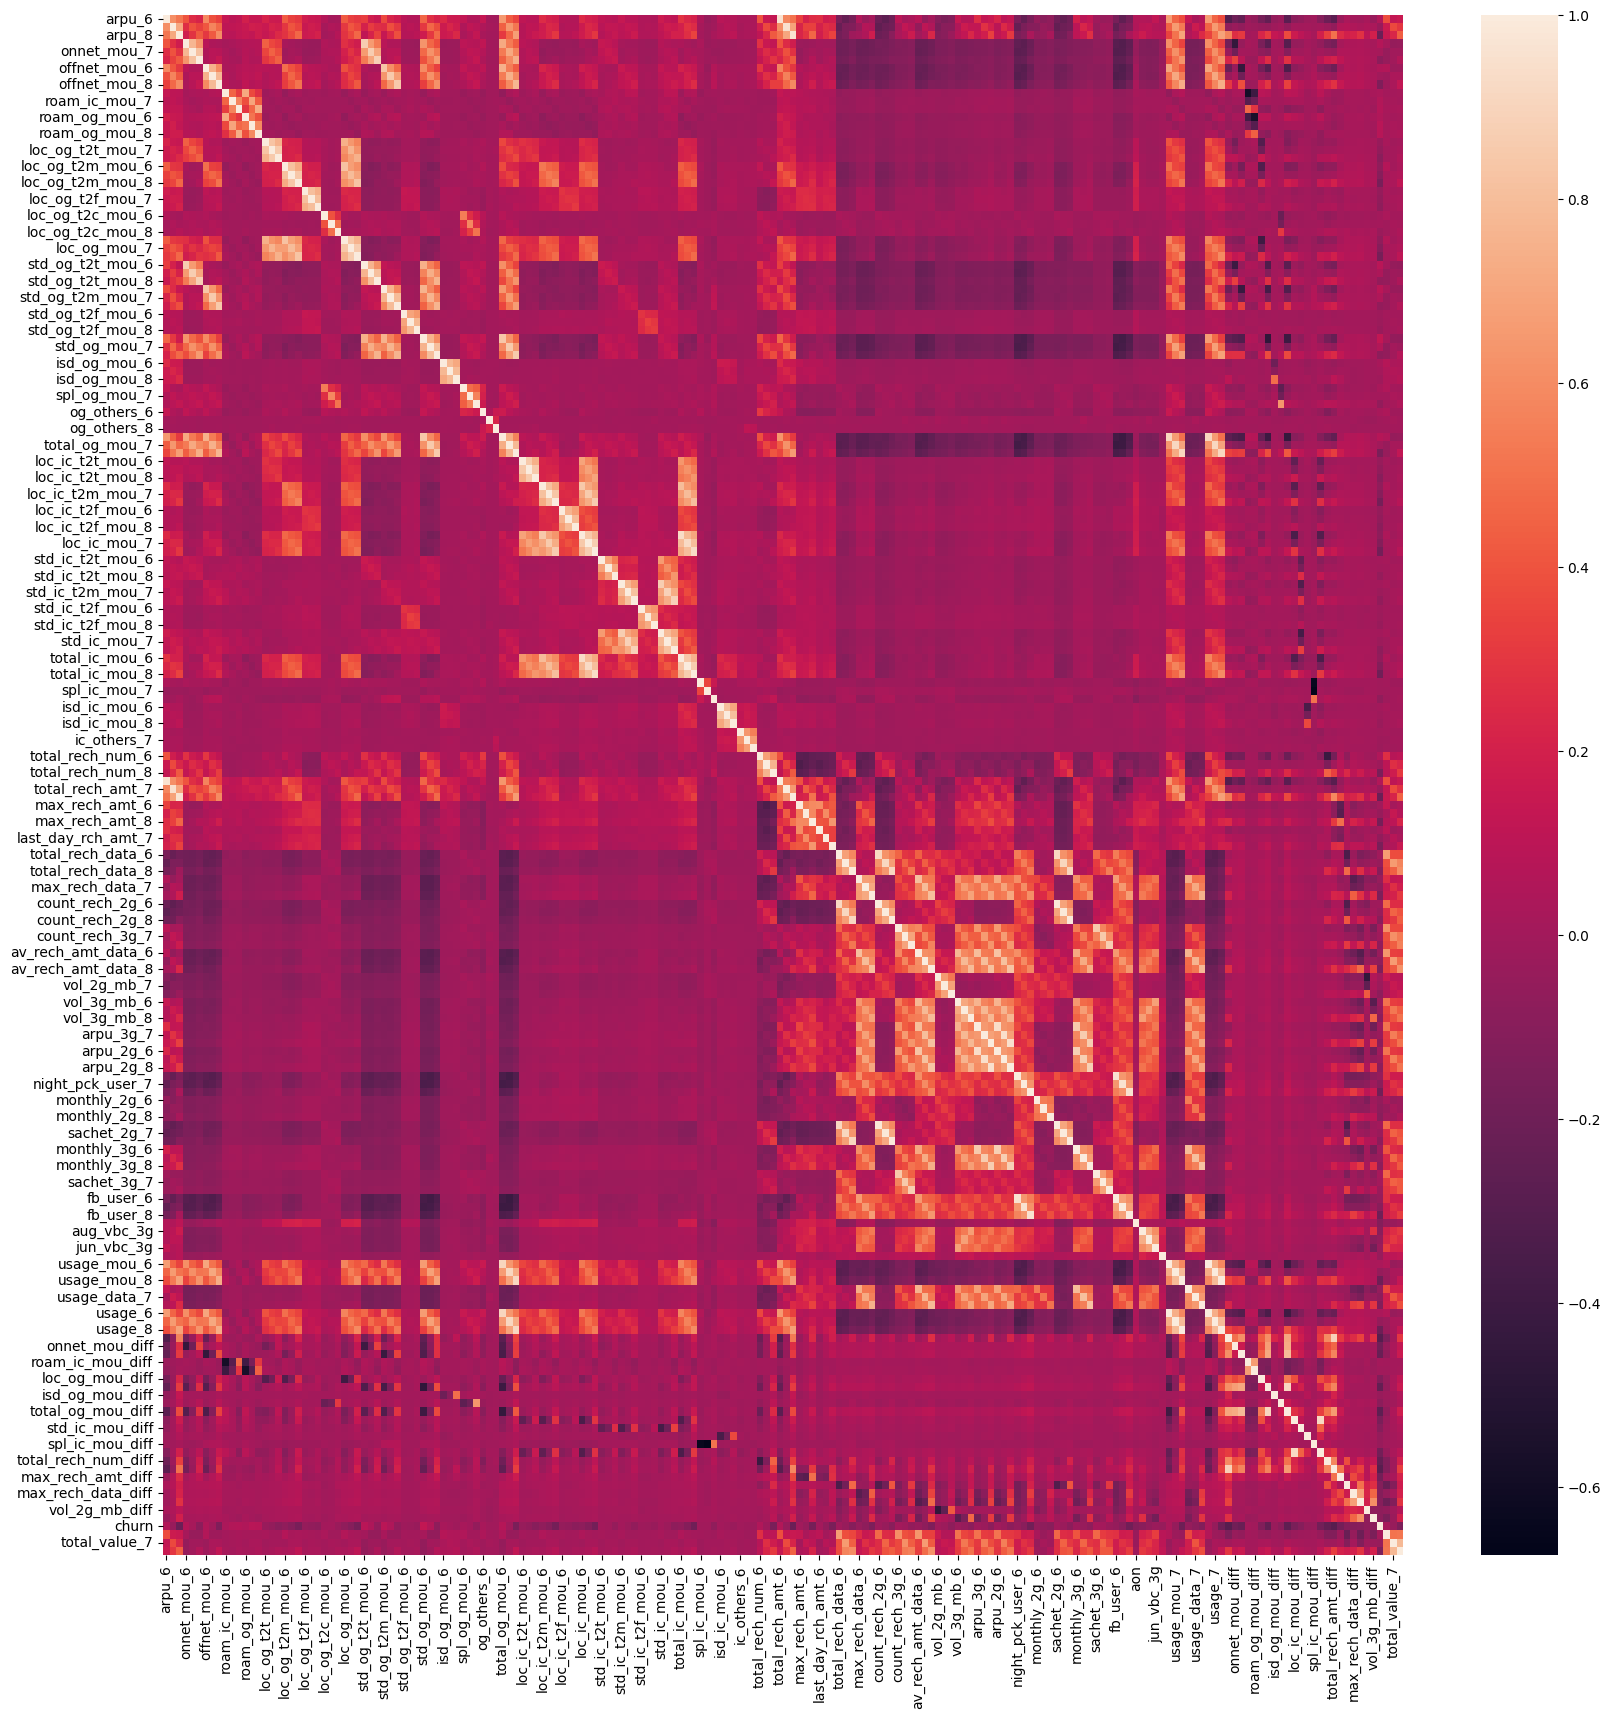

In [42]:
plt.figure(figsize=(20,20))
sns.heatmap(hvc.corr())

### Data Preparation

In [43]:
# splitting data into train and test sets
# since there is class imbalance we are using stratify option

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(hvc.drop(columns="churn"), hvc.churn, train_size=0.75, random_state=42, stratify = hvc.churn)

In [44]:
hvc.churn.value_counts()/len(hvc)

churn
0    0.917086
1    0.082914
Name: count, dtype: float64

In [45]:
y_train.value_counts()/len(y_train)

churn
0    0.917071
1    0.082929
Name: count, dtype: float64

In [46]:
y_test.value_counts()/len(y_test)

churn
0    0.91713
1    0.08287
Name: count, dtype: float64

### Data Scaling

In [47]:
# Using Standard Scaling for numerical columns only

from sklearn.preprocessing import StandardScaler

scaling = StandardScaler()
x_train[num_columns_list] = scaling.fit_transform(x_train[num_columns_list])
x_test[num_columns_list] = scaling.transform(x_test[num_columns_list])
x_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
72122  0.225901 -1.494375 -1.272164     1.948514    -0.583453    -0.540940   
11089  1.268804  0.510196  0.475090     0.276977    -0.246655    -0.148178   
77026 -0.377083 -0.119288  0.029340    -0.353431    -0.167986    -0.166251   
35140 -0.415350 -0.290818  3.782251    -0.569723    -0.333225     2.244124   
62801 -0.123816  0.429343  0.752835    -0.426503    -0.404153    -0.405142   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  \
72122     -0.666371     -0.783855     -0.728827      -0.229471  ...   
11089     -0.016001      0.015543      0.255599      -0.144272  ...   
77026     -0.012951      0.099064      0.208065      -0.229471  ...   
35140     -0.293045     -0.403241      0.163822      -0.229471  ...   
62801      0.289156      1.200099      1.211072      -0.229471  ...   

       total_rech_amt_diff  max_rech_amt_diff  total_rech_data_diff  \
72122            -0.877129          -0.832673             -0.871827   
11089            -0.625148           0.318163              0.543220   
77026             0.371452           0.401024              0.071537   
35140             5.256773           1.105336              0.071537   
62801             0.876830           0.087996              0.071537   

       max_rech_data_diff  av_rech_amt_data_diff  vol_2g_mb_diff  \
72122           -0.084420              -0.229027       -0.341289   
11089            0.517580               1.452491       -0.116760   
77026            0.088568               0.097019        0.093938   
35140            0.088568               0.097019        0.093938   
62801            0.088568               0.097019        0.093938   

       vol_3g_mb_diff  total_value_6  total_value_7  total_value_8  
72122        0.010568       0.051285      -0.828898      -0.756302  
11089        1.214000       0.195939      -0.057456       0.101045  
77026        0.010568      -0.522316      -0.400722      -0.298783  
35140        0.010568      -0.555763      -0.423220       1.055343  
62801        0.010568      -0.371809      -0.269367      -0.011131  

[5 rows x 187 columns]

### Dimentionality Reduction with PCA

In [48]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x_train[num_columns_list])

PCA()

In [49]:
var_explain = {k:v*100 for (k,v) in dict(zip(num_columns_list, pca.explained_variance_ratio_)).items() if v*100 > .2}
var_explain

{'arpu_6': 11.901121842297991,
 'arpu_7': 9.68079631440022,
 'arpu_8': 5.655008236473503,
 'onnet_mou_6': 5.200544466209946,
 'onnet_mou_7': 4.533693367740933,
 'onnet_mou_8': 3.2389592713810913,
 'offnet_mou_6': 2.6427474462702865,
 'offnet_mou_7': 2.572559380862462,
 'offnet_mou_8': 2.283038214739417,
 'roam_ic_mou_6': 2.095145046037808,
 'roam_ic_mou_7': 1.968629265160688,
 'roam_ic_mou_8': 1.8610716441471145,
 'roam_og_mou_6': 1.717128752512245,
 'roam_og_mou_7': 1.5998520940979435,
 'roam_og_mou_8': 1.5469494050202977,
 'loc_og_t2t_mou_6': 1.5059152783952428,
 'loc_og_t2t_mou_7': 1.4827366501819448,
 'loc_og_t2t_mou_8': 1.4380820503867,
 'loc_og_t2m_mou_6': 1.3764022967243061,
 'loc_og_t2m_mou_7': 1.318377328790243,
 'loc_og_t2m_mou_8': 1.2933430055449164,
 'loc_og_t2f_mou_6': 1.2706646902504888,
 'loc_og_t2f_mou_7': 1.2369668229370767,
 'loc_og_t2f_mou_8': 1.1411449320003062,
 'loc_og_t2c_mou_6': 1.0987814369026148,
 'loc_og_t2c_mou_7': 0.9872718916416907,
 'loc_og_t2c_mou_8': 0.

In [50]:
# percentage of variance explained by pca
sum(var_explain.values())

95.57317675429144

In [51]:
# number of components
len(var_explain.values())

72

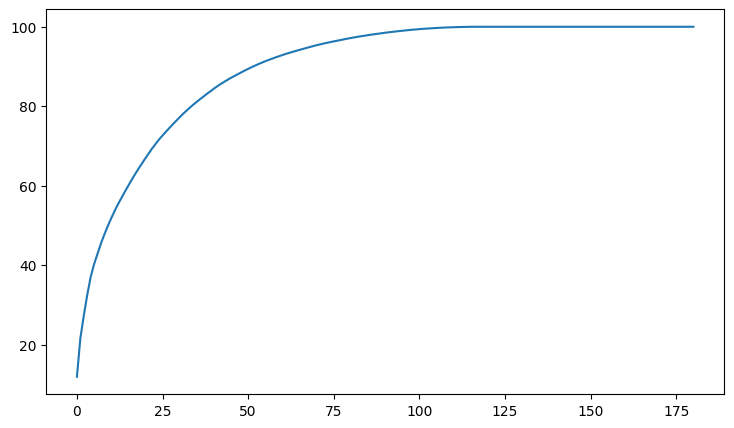

In [52]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20))
plt.plot(cumulative_variance)

In [53]:
# doing pca with 70 components as they explain about 95% of variance

pca = PCA(70)
x_train_pca = pca.fit_transform(x_train[num_columns_list])
x_train_pca.shape

(21030, 70)

In [54]:
sum(pca.explained_variance_ratio_)

0.9513907364938499

In [55]:
# adding categorical columns to x_train_pca
x_train_pca = np.concatenate((x_train_pca, x_train[cat_column_list_3]), axis=1)
x_train_pca.shape

(21030, 76)

In [56]:
# applying pca for test set also
x_test_pca = pca.transform(x_test[num_columns_list])
x_test_pca = np.concatenate((x_test_pca, x_test[cat_column_list_3]), axis=1)
x_test_pca.shape

(7011, 76)

### Building Logistic Regression Baseline

In [57]:
# defining base logistic regression function
from sklearn.linear_model import LogisticRegression

# using penality as l1 because there are a lot of features 
# with very less importance
lr = LogisticRegression(penalty="l1",class_weight={0:0.1, 1:0.9}, solver="liblinear")
lr.fit(x_train_pca, y_train)

LogisticRegression(class_weight={0: 0.1, 1: 0.9}, penalty='l1',
                   solver='liblinear')

In [58]:
lr.coef_

array([[-0.14248613, -0.31386245,  0.14707553, -0.42361608,  0.10573521,
         0.00242018, -0.01537201, -0.07546097, -0.12094358, -0.06805951,
        -0.00329519,  0.01691365,  0.08110411, -0.24827484,  0.09636498,
         0.1161192 , -0.06175481,  0.0835777 ,  0.06904018, -0.05120533,
        -0.24007355, -0.14464515, -0.08162312, -0.11087913, -0.13719524,
         0.22443532, -0.04591119, -0.29865304,  0.06681433,  0.03595756,
        -0.05024196,  0.05868884,  0.13301135, -0.05069181, -0.02163476,
        -0.21756021,  0.06778936,  0.10333054, -0.39521081, -0.17716246,
        -0.16420907, -0.35022807,  0.08051122,  0.34410636,  0.03801655,
        -0.93306757, -0.03142777,  0.11784419, -0.19480354,  0.        ,
         0.01519074, -0.2724126 , -0.17206327,  0.0988282 ,  0.07470308,
         0.02374254,  0.        ,  0.06465445, -0.11104342,  0.09687981,
        -0.0399021 ,  0.22965787,  0.        , -0.18668401,  0.17317386,
        -0.29566796, -0.27090222,  0.12697719,  0.2

In [59]:
# function to calculate specificity which we need to optimise in this task
def specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn+fp)

In [60]:
# importing metrics and printing confusion for training data
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, roc_auc_score

y_train_pred = lr.predict(x_train_pca)
confusion_matrix(y_train, y_train_pred)

array([[16327,  2959],
       [  320,  1424]])

In [61]:
# roc_auc score for training data
roc_auc_score(y_train, y_train_pred)

0.8315432024180681

In [62]:
# calculating specificity for training data
specificity(y_train, y_train_pred)

0.8465726433682464

In [63]:
# printing confusion for testing data
y_test_pred = lr.predict(x_test_pca)
confusion_matrix(y_test, y_test_pred)

array([[5430, 1000],
       [ 125,  456]])

In [64]:
# roc_auc score for testing data
roc_auc_score(y_test, y_test_pred)

0.8146663525909905

In [65]:
# calculating specificity for testing data
specificity(y_test, y_test_pred)

0.8444790046656299

### Building and Tuning Random Forest Based Model

In [66]:
# defining a Random Forest model, rf with class_weight to handle class imbalance

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

params = {
#     'n_estimators' : [50, 100, 200],
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20],
    'min_samples_split' : [5, 10, 20],
#     'max_features' : [1, 2, 5, 10, 20],
#     'criterion': ["gini", "entropy"]
}

model = GridSearchCV(estimator=rf, cv=5, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=5)

In [67]:
#fitting the data in the model
model.fit(x_train_pca, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 2/5] END max_depth=2, min_samples_leaf=5, min_samples_split=5;, score=0.821 total time=   5.7s
[CV 1/5] END max_depth=2, min_samples_leaf=5, min_samples_split=5;, score=0.850 total time=   5.7s
[CV 3/5] END max_depth=2, min_samples_leaf=5, min_samples_split=5;, score=0.838 total time=   5.6s
[CV 4/5] END max_depth=2, min_samples_leaf=5, min_samples_split=5;, score=0.851 total time=   5.7s
[CV 5/5] END max_depth=2, min_samples_leaf=5, min_samples_split=5;, score=0.833 total time=   5.8s
[CV 1/5] END max_depth=2, min_samples_leaf=5, min_samples_split=10;, score=0.839 total time=   5.8s
[CV 2/5] END max_depth=2, min_samples_leaf=5, min_samples_split=10;, score=0.821 total time=   5.8s
[CV 3/5] END max_depth=2, min_samples_leaf=5, min_samples_split=10;, score=0.836 total time=   6.0s
[CV 4/5] END max_depth=2, min_samples_leaf=5, min_samples_split=10;, score=0.856 total time=   6.0s
[CV 5/5] END max_depth=2, min_samples_leaf=

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10, 20]},
             scoring='roc_auc', verbose=5)

In [69]:
best_rf_model_pca = model
# print best hyperparameters
print("Best AUC: ", best_rf_model_pca.best_score_)
print("Best hyperparameters: ", best_rf_model_pca.best_params_)

Best AUC:  0.8816228277743882
Best hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 20}


In [70]:
best_rf_model_pca = RandomForestClassifier(max_depth= 20, min_samples_leaf=20, min_samples_split=10, oob_score=True)

In [71]:
best_rf_model_pca.fit(x_train_pca, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=20, min_samples_split=10,
                       oob_score=True)

In [72]:
# print confusion matrix for train data
y_train_pred = best_rf_model_pca.predict(x_train_pca)
confusion_matrix(y_train, y_train_pred)

array([[19257,    29],
       [ 1289,   455]])

In [73]:
# roc_auc score for training data
roc_auc_score(y_train, y_train_pred)

0.6296954069929511

In [74]:
# calculating specificity for training data
specificity(y_train, y_train_pred)

0.9984963185730582

In [75]:
# print confusion matrix for test data
y_test_pred = best_rf_model_pca.predict(x_test_pca)
confusion_matrix(y_test, y_test_pred)

array([[6398,   32],
       [ 513,   68]])

In [76]:
# roc_auc score for tetsing data
roc_auc_score(y_test, y_test_pred)

0.5560314575342026

In [77]:
# calculating specificity for testing data
specificity(y_test, y_test_pred)

0.9950233281493002

### Building and XGBoost Model

In [80]:
# A parameter grid for XGBoost

import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

xgb = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')

params = {
#         'n_estimators' : [100, 200, 500, 750], # no of trees 
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],  # eta
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 4, 5, 10, 12]
        }

folds = 5

param_comb = 800

model_xgb = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='accuracy', 
                                   n_jobs=-1, cv=5, verbose=3, random_state=42)

In [81]:
model_xgb.fit(x_train_pca, y_train)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
[CV 1/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, min_child_weight=10, subsample=0.8;, score=0.917 total time=   4.2s
[CV 3/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, min_child_weight=10, subsample=0.8;, score=0.917 total time=   4.2s
[CV 2/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, min_child_weight=10, subsample=0.8;, score=0.917 total time=   4.2s
[CV 4/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, min_child_weight=10, subsample=0.8;, score=0.917 total time=   4.1s
[CV 5/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, min_child_weight=10, subsample=0.8;, score=0.917 total time=   4.1s
[CV 1/5] END colsample_bytree=1.0, gamma=1.5, learning_rate=0.1, min_child_weight=10, subsample=1.0;, score=0.935 total time=   4.2s
[CV 2/5] END colsample_bytree=1.0, gamma=1.5, learning_rate=0.1, min_child_weight=10, subsample=1.0;, score=0.930 total time=   4.2s


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=-1,
                                           num_parallel_tree=None, ...),
                   n_iter=800, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.1, 0.5, 1, 1.5, 5],
                                        'learning_rate': [0.01, 0.02, 0.05, 0.1,
                                                          0.25],
                                        'min_child_weight': [1, 5, 7, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=3)

In [82]:
boost_model_pca = model_xgb.best_estimator_

In [83]:
y_train_pred = boost_model_pca.predict(x_train_pca)
confusion_matrix(y_train, y_train_pred)

array([[19162,   124],
       [  847,   897]])

In [84]:
# roc_auc score for training data
roc_auc_score(y_train, y_train_pred)

0.7539526640040264

In [85]:
specificity(y_train, y_train_pred)

0.9935704656227315

In [86]:
y_test_pred = boost_model_pca.predict(x_test_pca)
confusion_matrix(y_test, y_test_pred)

array([[6306,  124],
       [ 402,  179]])

In [87]:
roc_auc_score(y_test, y_test_pred)

0.6444024487195616

In [88]:
specificity(y_test, y_test_pred)

0.9807153965785381

### Selecting the best model based on evaluation

Random forest model is working better asthe number of false positives are less in this model<br>
so we can use the random forest model for final prediction of churn

### Selecting Best Features

In [89]:
# defining a Random Forest model, rf with class_weight to handle class imbalance

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

params = {
#     'n_estimators' : [50, 100, 200],
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50],
#     'min_samples_split' : [5, 10, 20, 50],
    "max_features": ['auto', 0.4],
    'criterion': ["gini", "entropy"]
}

rf_model = GridSearchCV(estimator=rf, cv=5, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=5)

In [90]:
rf_model.fit(x_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5;, score=nan total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5;, score=nan total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5;, score=nan total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5;, score=nan total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=20;, score=nan total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5;, score=nan total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=20;, score=nan total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=10;, score=nan total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=2, max_f

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'max_features': ['auto', 0.4],
                         'min_samples_leaf': [5, 10, 20, 50]},
             scoring='roc_auc', verbose=5)

In [91]:
# print best hyperparameters
print("Best AUC: ", rf_model.best_score_)
print("Best hyperparameters: ", rf_model.best_params_)

Best AUC:  0.9356298806451344
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 0.4, 'min_samples_leaf': 20}


In [92]:
best_rf_model = rf_model.best_estimator_

In [93]:
# printing confusion matrix for 
y_train_pred = best_rf_model.predict(x_train)
confusion_matrix(y_train, y_train_pred)

array([[19047,   239],
       [  764,   980]])

In [94]:
# roc_auc score for training data
roc_auc_score(y_train, y_train_pred)

0.7747670982516195

In [95]:
# calculating specificity for training data
specificity(y_train, y_train_pred)

0.9876075909986519

In [96]:
#printing confusion matrix for testing data
y_test_pred = best_rf_model.predict(x_test)
confusion_matrix(y_test, y_test_pred)

array([[6312,  118],
       [ 297,  284]])

In [97]:
# calculating roc_auc score for test data
roc_auc_score(y_test, y_test_pred)

0.7352304574886973

In [98]:
# calculating specificity of the testing data
specificity(y_test, y_test_pred)

0.9816485225505444

In [99]:
# extracting top 10 features basd on the importance given by random forest model
features = x_train.columns

importance = best_rf_model.feature_importances_

imp_df = pd.DataFrame({'features': features, 'importance': importance*100})
imp_df = imp_df[['features', 'importance']]

imp_df = imp_df.sort_values('importance', ascending=False).reset_index(drop=True)
imp_df.head(10)

features  importance
0              usage_8   22.907364
1          usage_mou_8   11.449867
2       total_ic_mou_8    6.400889
3         loc_ic_mou_8    5.893146
4     loc_ic_t2m_mou_8    3.350922
5   last_day_rch_amt_8    3.183660
6  total_rech_amt_diff    2.527939
7        roam_og_mou_8    2.522178
8    total_og_mou_diff    1.925136
9        roam_ic_mou_8    1.575630

In [100]:
# checking the correlation of top 10 features with target set
hvc[list(imp_df.features[0:10])+["churn"]].corr().sort_values('churn', ascending=False)["churn"]

churn                  1.000000
roam_og_mou_8          0.079633
roam_ic_mou_8          0.065407
last_day_rch_amt_8    -0.151611
loc_ic_t2m_mou_8      -0.172056
loc_ic_mou_8          -0.182541
total_ic_mou_8        -0.192306
usage_mou_8           -0.206431
usage_8               -0.206551
total_og_mou_diff     -0.262678
total_rech_amt_diff   -0.290242
Name: churn, dtype: float64

##### Best Features
roam_og_mou_8, last_day_rch_amt_8 , total_og_mou_8 , loc_ic_t2m_mou_8, total_ic_mou_8, usage_mou_8, usage_8 , total_og_mou_diff, total_rech_amt_diff

##### Inference
1. Need to provide good offers to people from roaming zone.
2. Need to provide good offers to people using STD and ISD calls frequestly.